## Lab 05

In [8]:
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import text
import os
import geopandas as gpd

In [9]:
host = 'localhost'
database = 'spatial'
user = 'postgres'
port = '5432'
password = os.getenv('SQL_PASSWORD')

In [10]:
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"

In [11]:
engine = create_engine(connection_string)
insp = inspect(engine)
insp.get_table_names()

['spatial_ref_sys']

### Exercise 1

1. Find airports that have fewer than three navigation aids within 1000 kilometers. These airports may require additional navigation support.

In [29]:
text_fewer = """
SELECT airport.name AS airport_name,
       COUNT(nav.name) AS nearby_nav_count,
       airport.geog AS geom
FROM ch09.airports AS airport
LEFT JOIN ch09.navaids AS nav
ON ST_DWithin(airport.geog, nav.geog, 1000000)  -- 50 km radius
GROUP BY airport.name, geom
HAVING COUNT(nav.name) < 3;
"""

<Axes: >

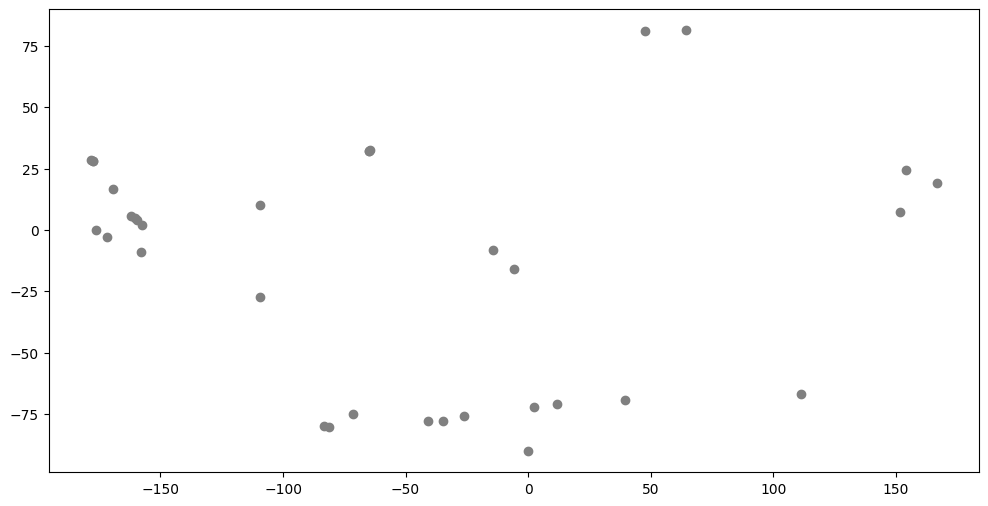

In [30]:
airport_fewer = gpd.read_postgis(text_fewer, con=engine)

print(len(airport_fewer.index))

fig, ax = plt.subplots(figsize=(12, 10))
airport_fewer.plot(ax=ax, color = 'grey')